# Food Demand Forecasting

# Importing Libraries

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [182]:
train = pd.read_csv("C:\\Users\\sulai\\Downloads\\train_GzS76OK\\train.csv")
train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [183]:
meal_info = pd.read_csv("C:\\Users\\sulai\\Downloads\\train_GzS76OK\\meal_info.csv")
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [184]:
center_info = pd.read_csv("C:\\Users\\sulai\\Downloads\\train_GzS76OK\\fulfilment_center_info.csv")
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [185]:
test = pd.read_csv("C:\\Users\\sulai\\Downloads\\test_QoiMO9B.csv")
test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


* At First we read the Dataset of train,meal_info,center_info,test

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [188]:
train = pd.merge(train, meal_info, on = "meal_id")
test = pd.merge(test, meal_info,on = "meal_id")
train = pd.merge(train, center_info, how = "left", on = "center_id")
test = pd.merge(test, center_info, how = "left", on = "center_id")

In [189]:
train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian,473,77,TYPE_A,4.5


## Understanding the Data and Data Description

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [192]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [193]:
print('The size of the DataFrame :', train.shape)

The size of the DataFrame : (456548, 15)


In [194]:
train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [195]:
print('COLUMN NAME,RECORD COUNT AND DATATYPES ARE AS FOLLOWS:')
train.info()

COLUMN NAME,RECORD COUNT AND DATATYPES ARE AS FOLLOWS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-

In [196]:
test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,Desert,Indian,473,77,TYPE_A,4.5
32569,1039516,155,61,2304,483.09,483.09,0,0,Desert,Indian,473,77,TYPE_A,4.5
32570,1158107,155,61,2664,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A,4.5
32571,1444235,155,61,2569,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A,4.5


In [197]:
train.duplicated().sum()

0

There is no duplicates

In [199]:
#To get insights of the datatypes in the dataframe
train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [200]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
train.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


## Defining Numerical and Categorical Columns

In [202]:
num_train = train.select_dtypes(include='number')
cat_train = train.select_dtypes(include='object_')

In [203]:
num_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,4.5


In [204]:
cat_train

,category,cuisine,center_type
0,Beverages,Thai,TYPE_C
1,Beverages,Thai,TYPE_C
2,Beverages,Thai,TYPE_C
3,Beverages,Indian,TYPE_C
4,Beverages,Indian,TYPE_C
...,...,...,...
456543,Desert,Indian,TYPE_A
456544,Desert,Indian,TYPE_A
456545,Salad,Italian,TYPE_A
456546,Salad,Italian,TYPE_A


In [205]:
print(f'We have {len(num_train.columns)} numerical columns:',num_train.columns.tolist())
print(f'We have {len(cat_train.columns)} categorical columns:',cat_train.columns.tolist())

We have 12 numerical columns: ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code', 'region_code', 'op_area']
We have 3 categorical columns: ['category', 'cuisine', 'center_type']


In [206]:
print('Missing Value Presence in different columns of DataFrame are as follows: ')
print('-'*100)
total = train.isnull().sum()
percent = (train.isnull().sum()/train.isnull().count()*100)
pd.concat([total,percent], axis=1, keys=['Total','Percent'])

Missing Value Presence in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percent
id,0,0.0
week,0,0.0
center_id,0,0.0
meal_id,0,0.0
checkout_price,0,0.0
base_price,0,0.0
emailer_for_promotion,0,0.0
homepage_featured,0,0.0
num_orders,0,0.0
category,0,0.0


After inspecting the dataframe, **no missing values** found.

## Unique Categories


In [209]:
print('-'*125)
print('Checking records for mis-spell, typo-error etc')
print('-'*125)

print("'category' variable have {} unique_category : \n{}\n".format(train['category'].nunique(), train['category'].unique()))
print('-'*125)

print("'cuisine' variable have {} unique_category : \n{}\n".format(train['cuisine'].nunique(), train['cuisine'].unique()))
print('-'*125)

print("'center_type' variable have {} unique_category : \n{}\n".format(train['center_type'].nunique(), train['center_type'].unique()))
print('-'*125)

print("'week' variable have {} unique_category : \n{}\n".format(train['week'].nunique(), train['week'].unique()))
print('-'*125)

print("'center_id' variable have {} unique_category : \n{}\n".format(train['center_id'].nunique(), train['center_id'].unique()))
print('-'*125)

print("'meal_id' variable have {} unique_category : \n{}\n".format(train['meal_id'].nunique(), train['meal_id'].unique()))
print('-'*125)

print("'emailer_for_promotion' variable have {} unique_category : \n{}\n".format(train['emailer_for_promotion'].nunique(), train['emailer_for_promotion'].unique()))
print('-'*125)

print("'homepage_featured' variable have {} unique_category : \n{}\n".format(train['homepage_featured'].nunique(), train['homepage_featured'].unique()))
print('-'*125)

print("'city_code' variable have {} unique_category : \n{}\n".format(train['city_code'].nunique(), train['city_code'].unique()))
print('-'*125)

print("'region_code' variable have {} unique_category : \n{}\n".format(train['region_code'].nunique(), train['region_code'].unique()))
print('-'*125)


-----------------------------------------------------------------------------------------------------------------------------
Checking records for mis-spell, typo-error etc
-----------------------------------------------------------------------------------------------------------------------------
'category' variable have 14 unique_category : 
['Beverages' 'Rice Bowl' 'Starters' 'Pasta' 'Sandwich' 'Biryani' 'Extras'
 'Pizza' 'Seafood' 'Other Snacks' 'Desert' 'Soup' 'Salad' 'Fish']

-----------------------------------------------------------------------------------------------------------------------------
'cuisine' variable have 4 unique_category : 
['Thai' 'Indian' 'Italian' 'Continental']

-----------------------------------------------------------------------------------------------------------------------------
'center_type' variable have 3 unique_category : 
['TYPE_C' 'TYPE_B' 'TYPE_A']

----------------------------------------------------------------------------------------------

## percentage of each category in categorical columns

In [211]:
print('-'*100)
print('The percentage of each category in categorical columns are as follow:')
print('-'*100+'\n')
for col in cat_train:
    print(train[col].value_counts(normalize=True)*100) #normalize=True: Converts the counts into proportions (relative frequencies)
    print('-'*100)

----------------------------------------------------------------------------------------------------
The percentage of each category in categorical columns are as follow:
----------------------------------------------------------------------------------------------------

category
Beverages       28.012389
Rice Bowl        7.317522
Sandwich         7.291895
Pizza            7.258382
Starters         6.558128
Other Snacks     6.435030
Desert           6.416412
Salad            6.255421
Pasta            6.065956
Seafood          5.895547
Biryani          4.515188
Extras           2.970553
Soup             2.776269
Fish             2.231310
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
cuisine
Italian        26.924880
Thai           25.893444
Indian         24.665972
Continental    22.515705
Name: proportion, dtype: float64
-------------------------------------------------------------------------------

* from above analysis
#### category
- **Total Categories:** 14
- **Most Frequent Category:** Beverages (28.01%)

#### cuisine
- **Total Categories:** 4
- **Most Frequent Category:** Italian   (26.92%)
#### center_type
- **Total Categories:** 3
- **Most Frequent Category:** TYPE_A (57.58%)


In [213]:
#Defines maximum value in the list
train['num_orders'].max()


24299

In [214]:
train['num_orders'].min()

13

# Exploratory Data Analysis

## Univariate Analysis

Numerical Features

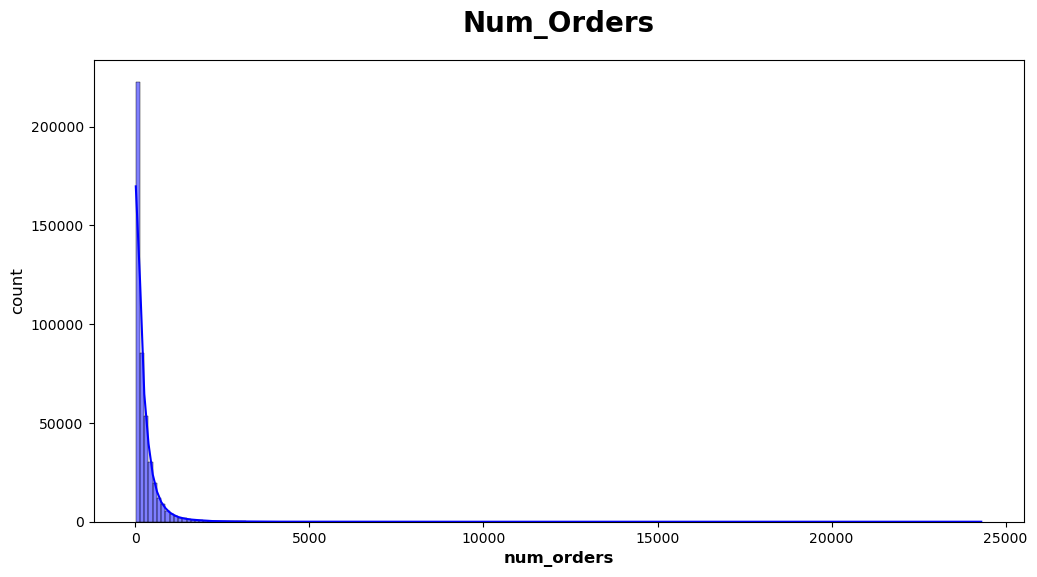

In [217]:
plt.subplots(figsize=(12,6))
sns.histplot(train.num_orders, bins=200, kde=True, color='b')
plt.title('Num_Orders', fontsize=20,weight='bold',pad=20)
plt.ylabel('count',fontsize=12)
plt.xlabel('num_orders',weight='bold',fontsize=12)
plt.show()

##  Plot histograms for numerical features

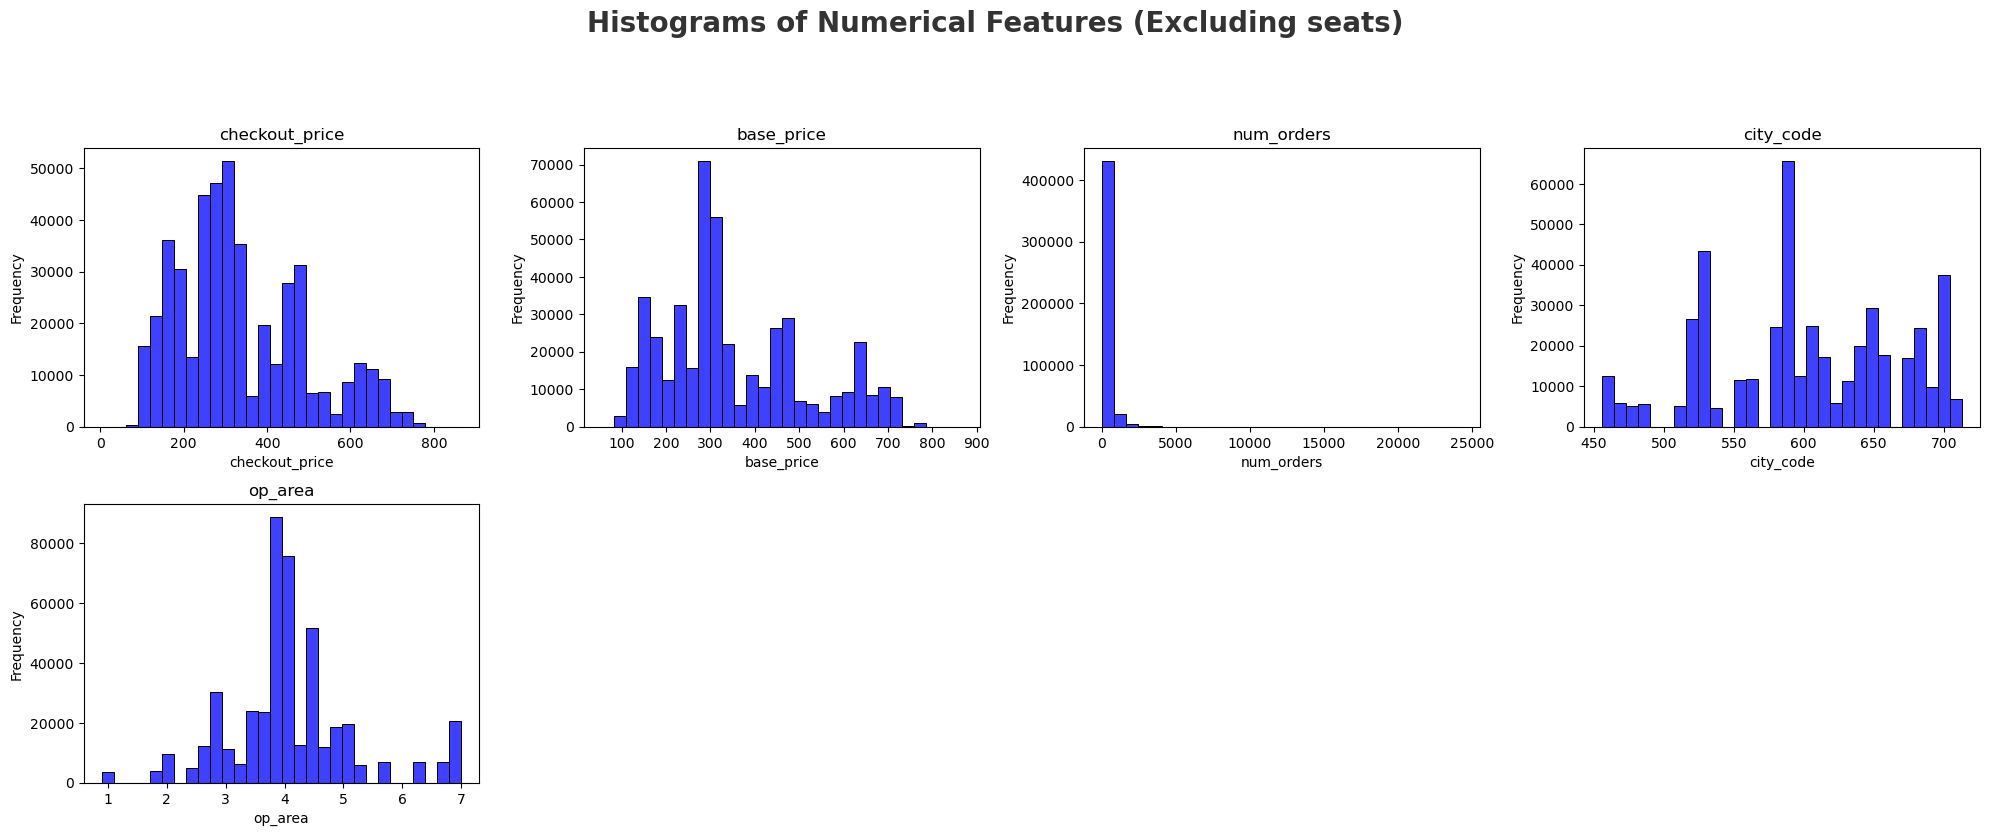

In [219]:

plt.figure(figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features (Excluding seats)', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

# Exclude the 'seats' column
num_train_excluding_seats = num_train.drop(columns=['emailer_for_promotion','homepage_featured','region_code','id','center_id','meal_id','week'])

for i, col in enumerate(num_train_excluding_seats.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(num_train[col], bins=30, color='b')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Skewness

In [221]:
skewness = num_train_excluding_seats.skew()
print(skewness)

checkout_price    0.672330
base_price        0.637661
num_orders        6.929966
city_code        -0.209131
op_area           0.664414
dtype: float64


* Here Base price and checkout price have slighly skewed only.

## Outlier Detection

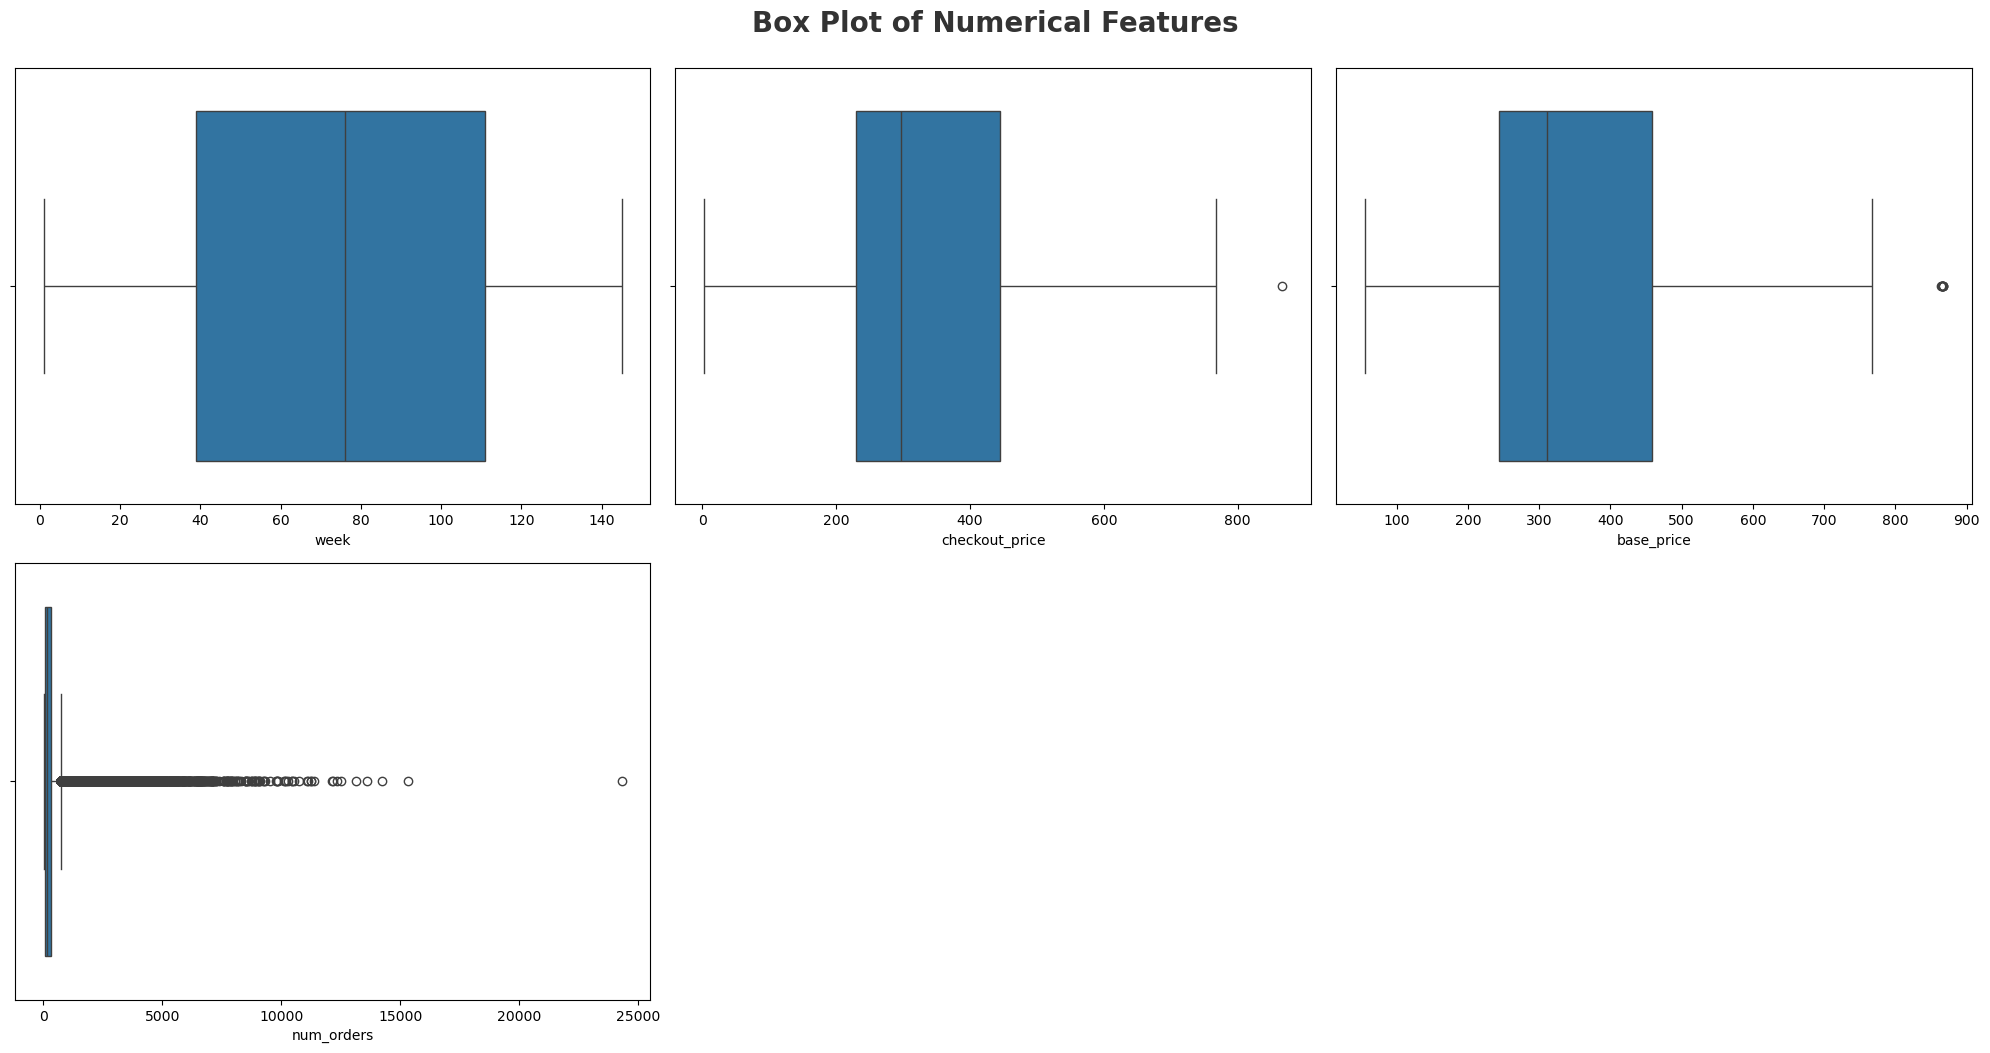

In [224]:
# Exclude the 'seats' column
num_train_filtered = num_train.drop(columns=['emailer_for_promotion','homepage_featured','region_code','id','center_id','meal_id','city_code','op_area'])

plt.figure(figsize=(20, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(num_train_filtered.columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=train[num_train_filtered.columns[i]])
    plt.xlabel(num_train_filtered.columns[i])
    plt.tight_layout()

plt.show()

## Categorical features 

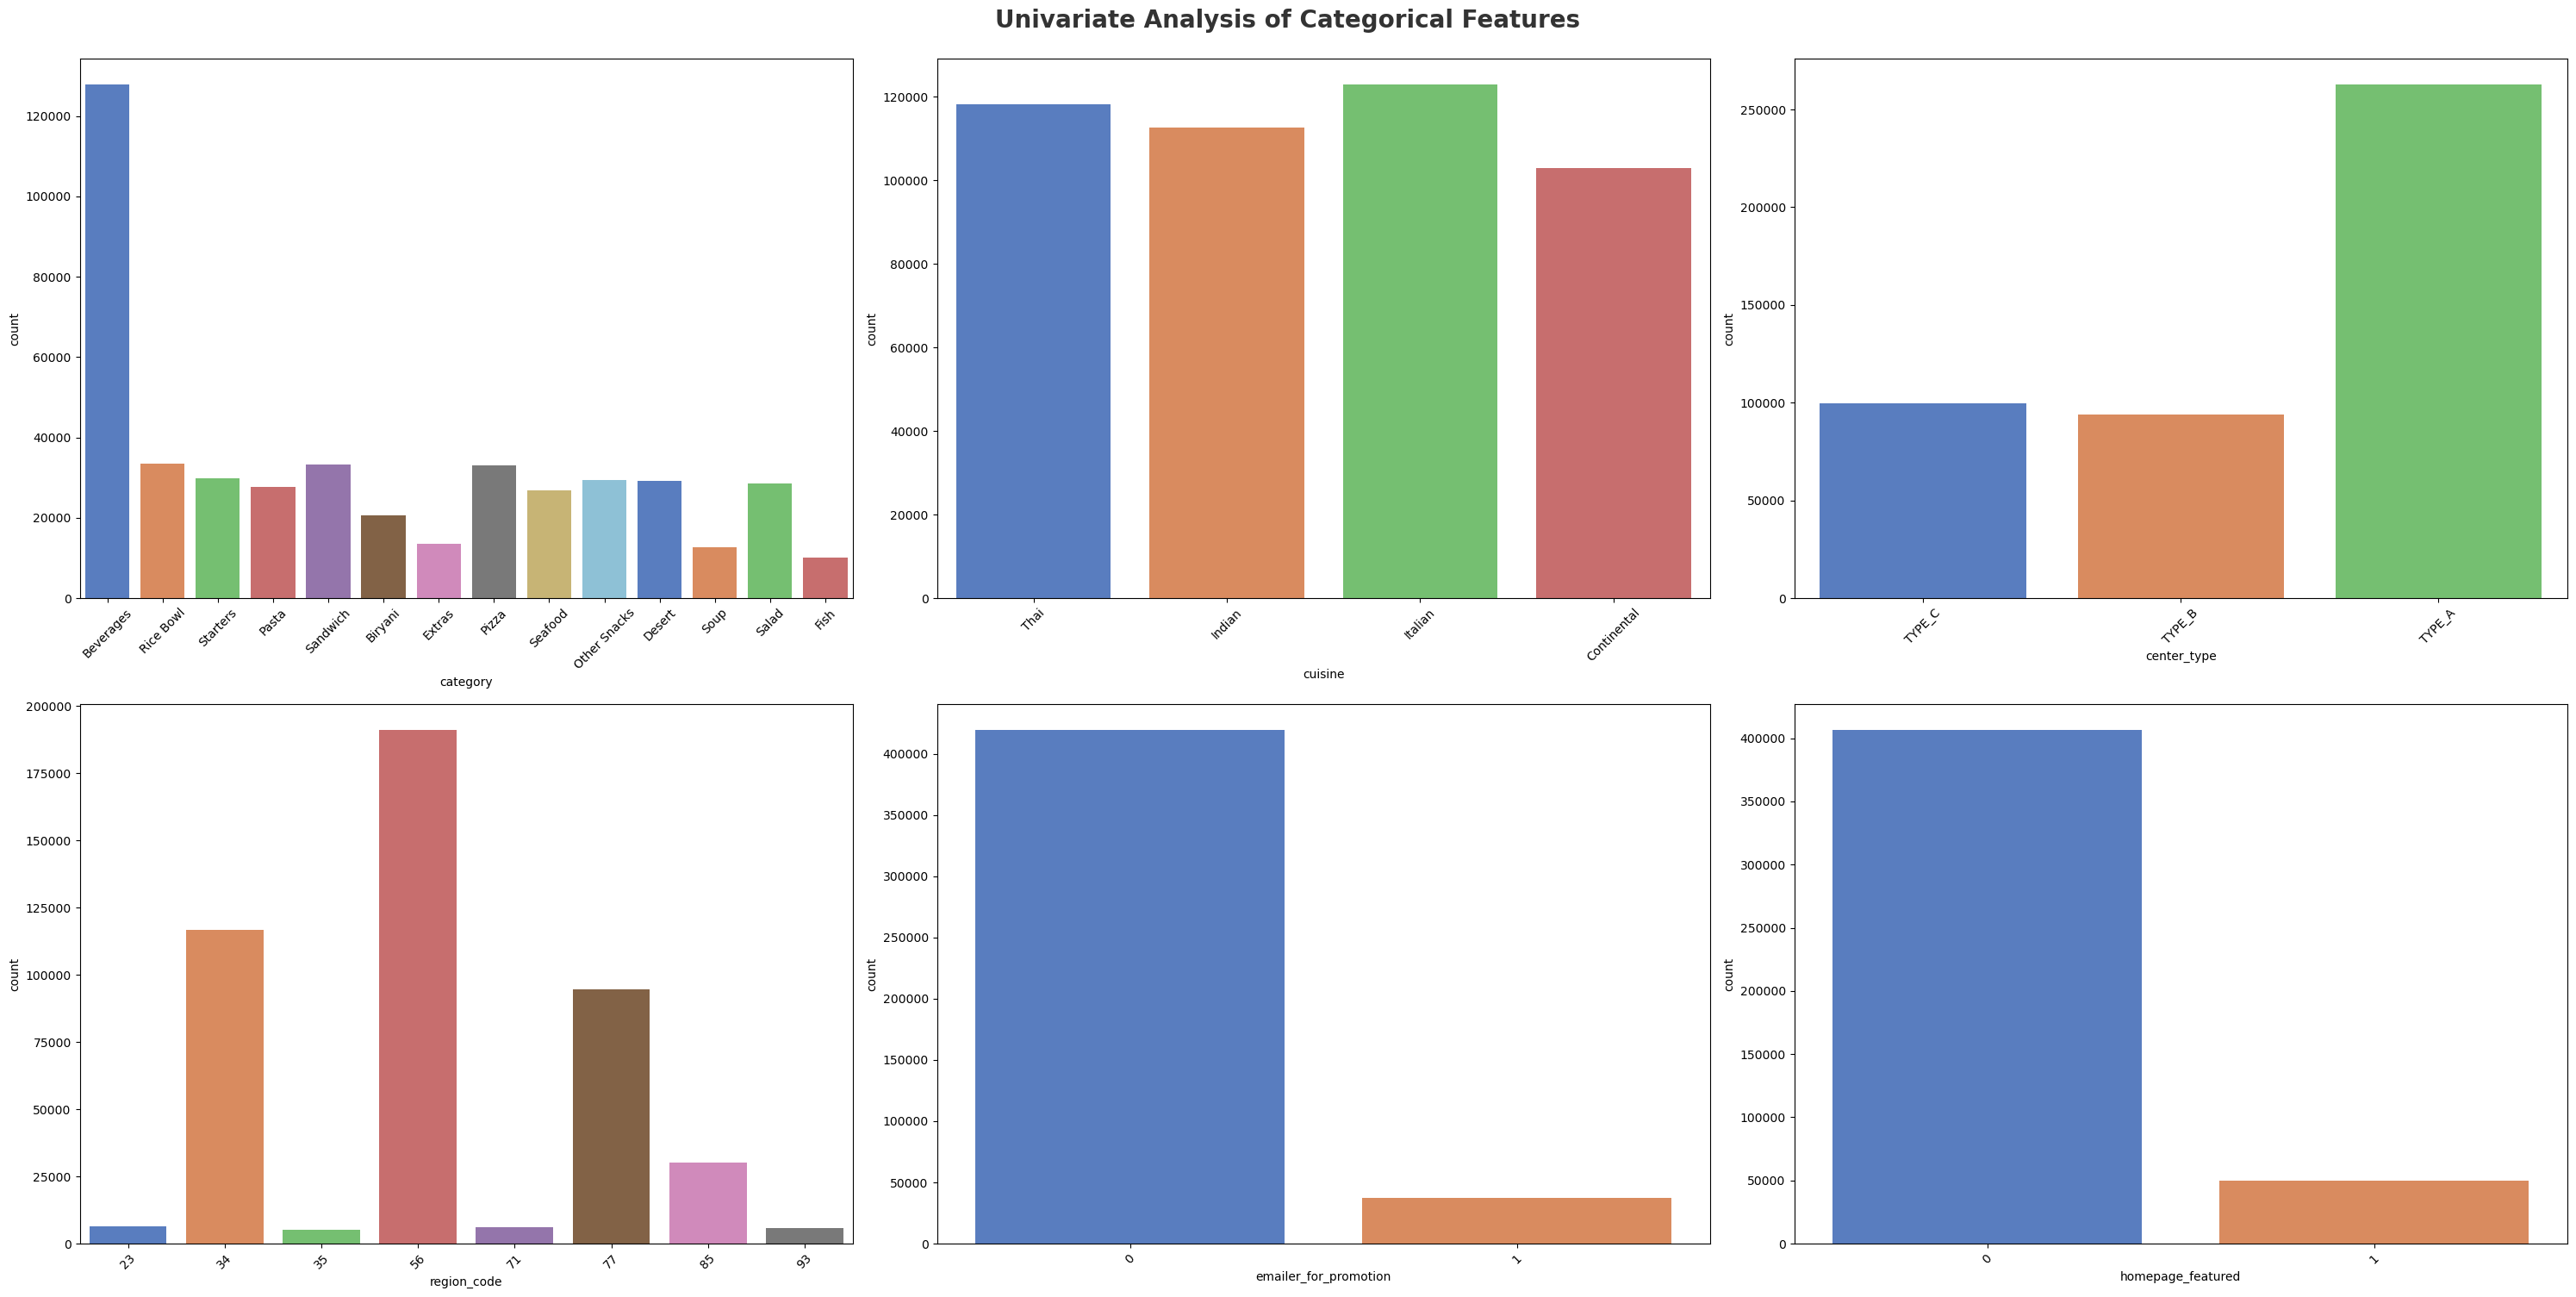

In [226]:
plt.figure(figsize=(30,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20,fontweight='bold', alpha=0.8, y=1.0)
cat1 = [ 'category', 'cuisine', 'center_type','region_code','emailer_for_promotion','homepage_featured']
for i in range(0,len(cat1)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=train[cat1[i]], palette= 'muted')
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

* Here it can see that the Category Beverages is high in count and Fish is low in count.
* most used cuisine is Italian and less is Continental
* Center Type A > Type C > Type B
* Region Code is Taken as Categorical Variable because of discrete numbers,so 56 is higher in region Code lower one is region code 35
* there is only less emailer_for_promotion.
* home_page_featured is also less.

In [228]:
train.groupby(['region_code'])['base_price'].sum().sort_values(ascending=True)

region_code
35     1868701.41
93     2055824.32
23     2252487.33
71     2262018.40
85    10584940.44
77    33699490.74
34    41554939.29
56    67411098.02
Name: base_price, dtype: float64

In [229]:
train.groupby(['region_code'])['checkout_price'].sum().sort_values(ascending=True)

region_code
35     1758719.84
93     1932856.35
23     2094740.37
71     2115252.05
85     9892937.86
77    31697548.03
34    39136518.06
56    63054447.62
Name: checkout_price, dtype: float64

In [230]:
continuous_features=[feature for feature in num_train if len(train[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'num_orders', 'city_code', 'op_area']


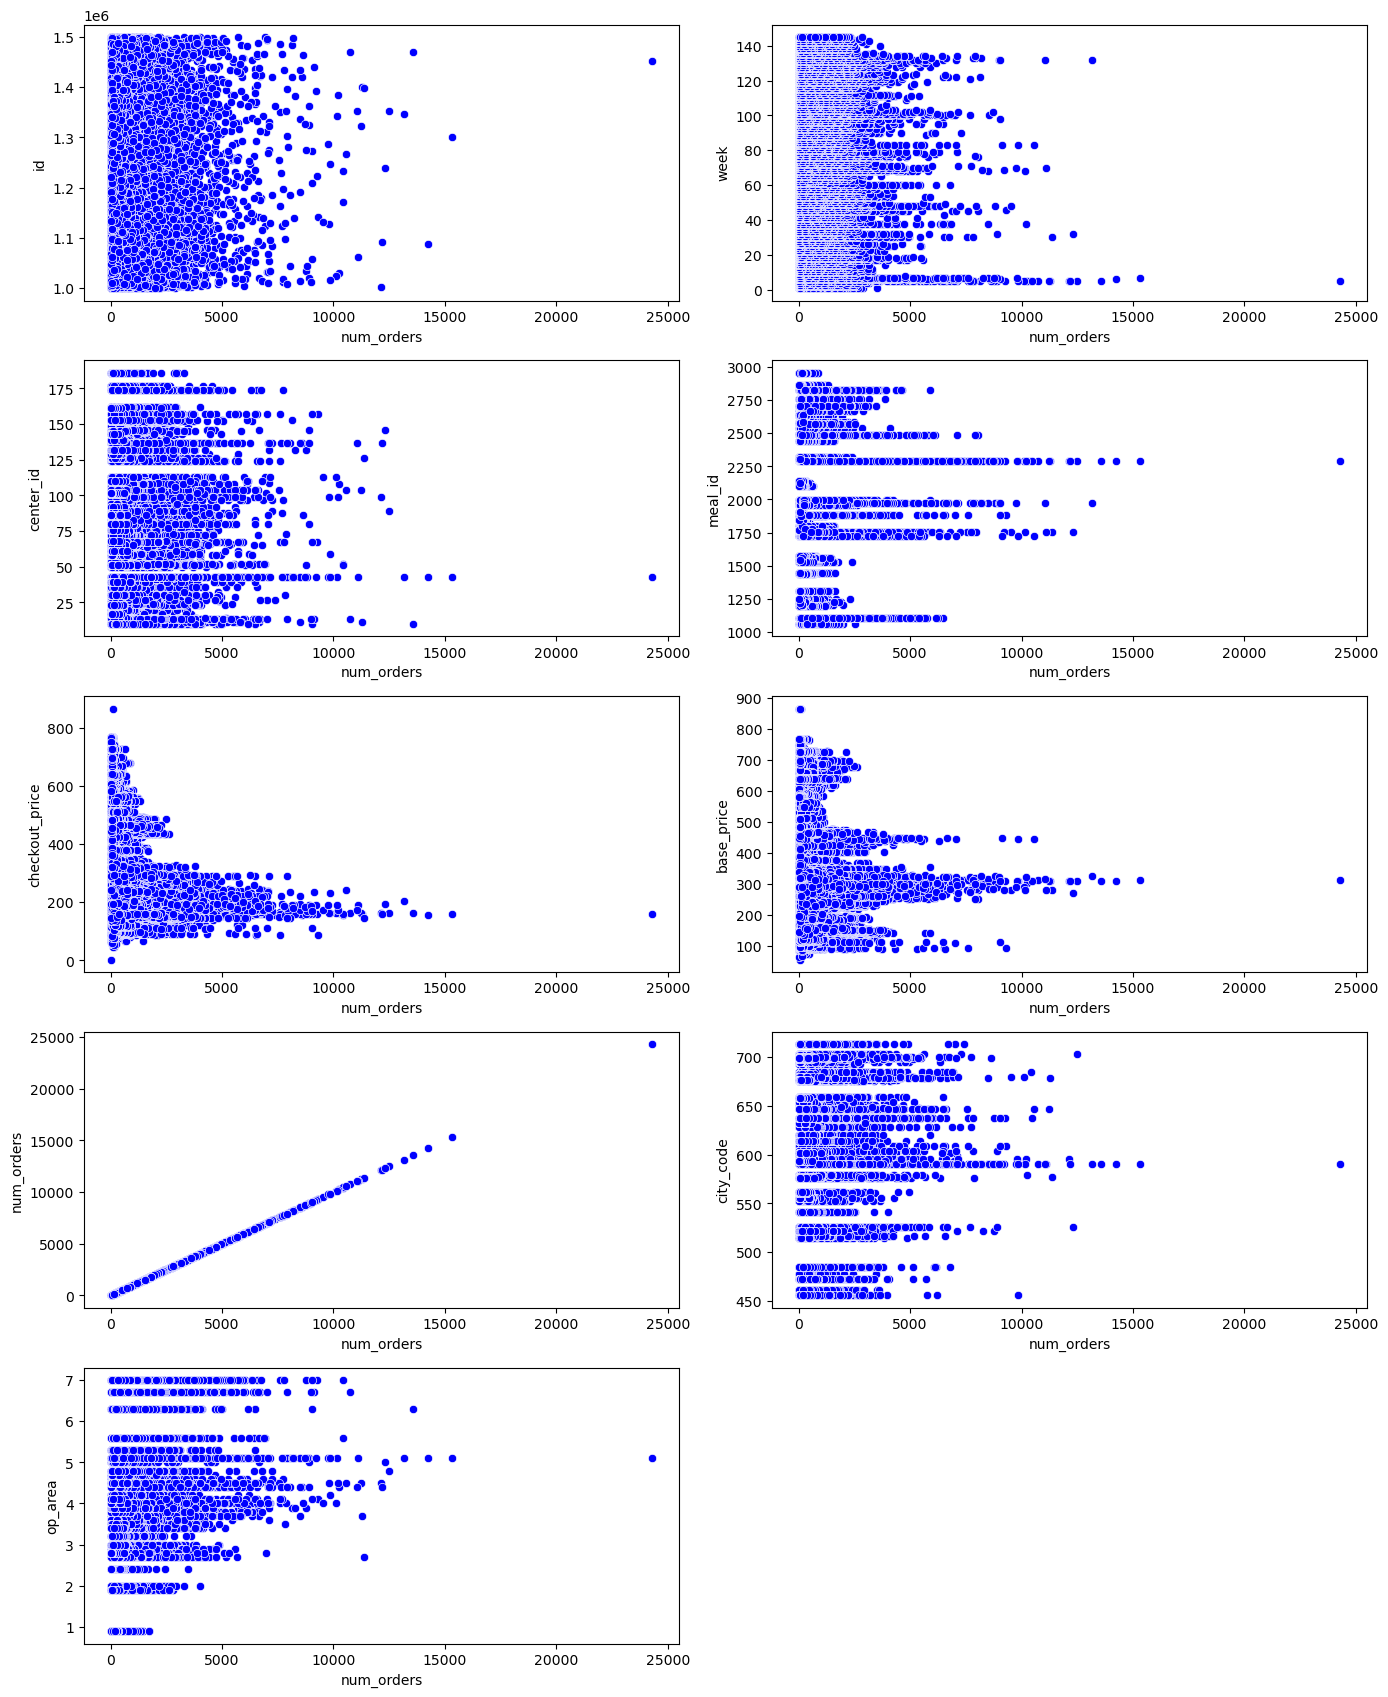

In [231]:
fig = plt.figure(figsize=(14, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(6, 2, i+1)

    sns.scatterplot(data= train ,x='num_orders', y=continuous_features[i], color='b')
     
    
plt.tight_layout()
plt.show()

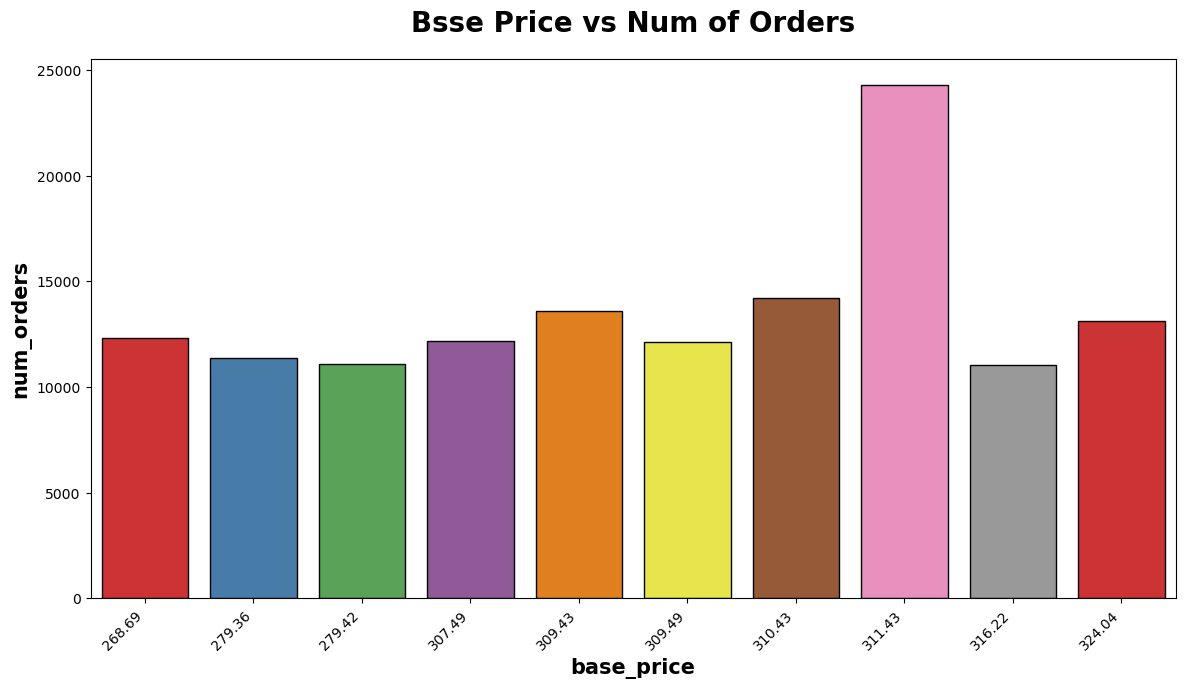

In [232]:
# Group by car name to get the highest selling price and sort the results
num_orders = train.groupby('base_price')['num_orders'].max().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x=num_orders.index, y=num_orders.values, palette='Set1', edgecolor='black')
plt.title('Bsse Price vs Num of Orders', weight='bold', fontsize=20, pad=20)
plt.xlabel('base_price', weight='bold', fontsize=15)
plt.ylabel('num_orders', weight='bold', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotate for better readability

plt.show()

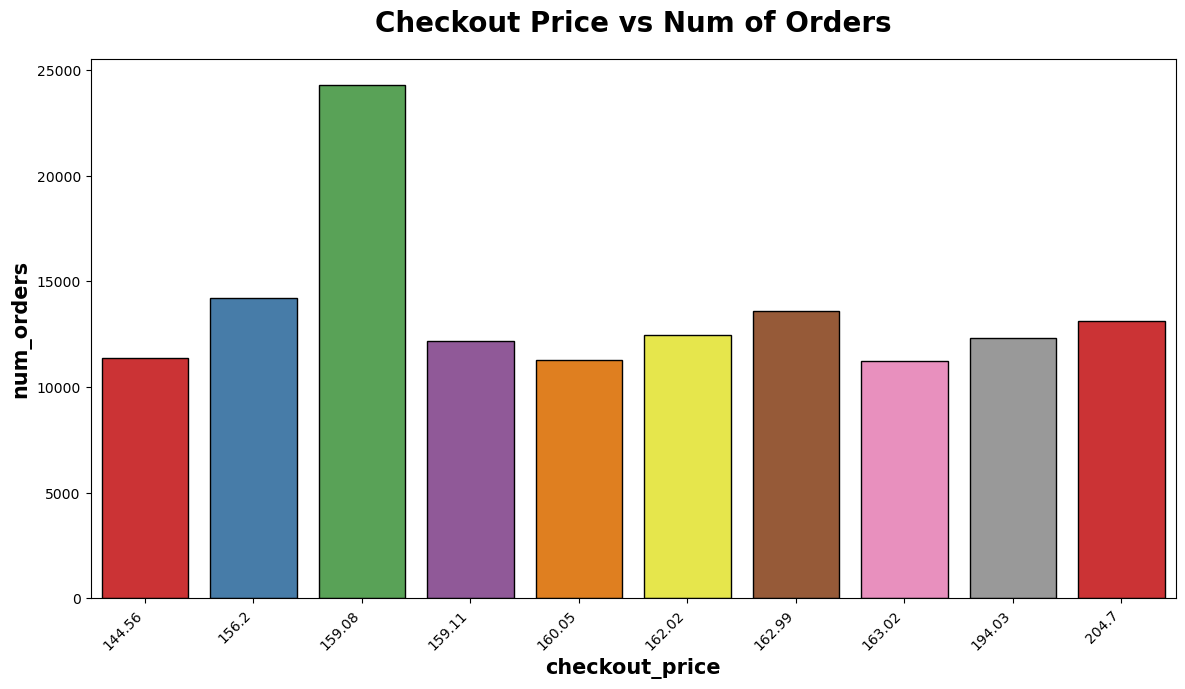

In [233]:
# Group by car name to get the highest selling price and sort the results
num_orders = train.groupby('checkout_price')['num_orders'].max().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x=num_orders.index, y=num_orders.values, palette='Set1', edgecolor='black')
plt.title('Checkout Price vs Num of Orders', weight='bold', fontsize=20, pad=20)
plt.xlabel('checkout_price', weight='bold', fontsize=15)
plt.ylabel('num_orders', weight='bold', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotate for better readability

plt.show()

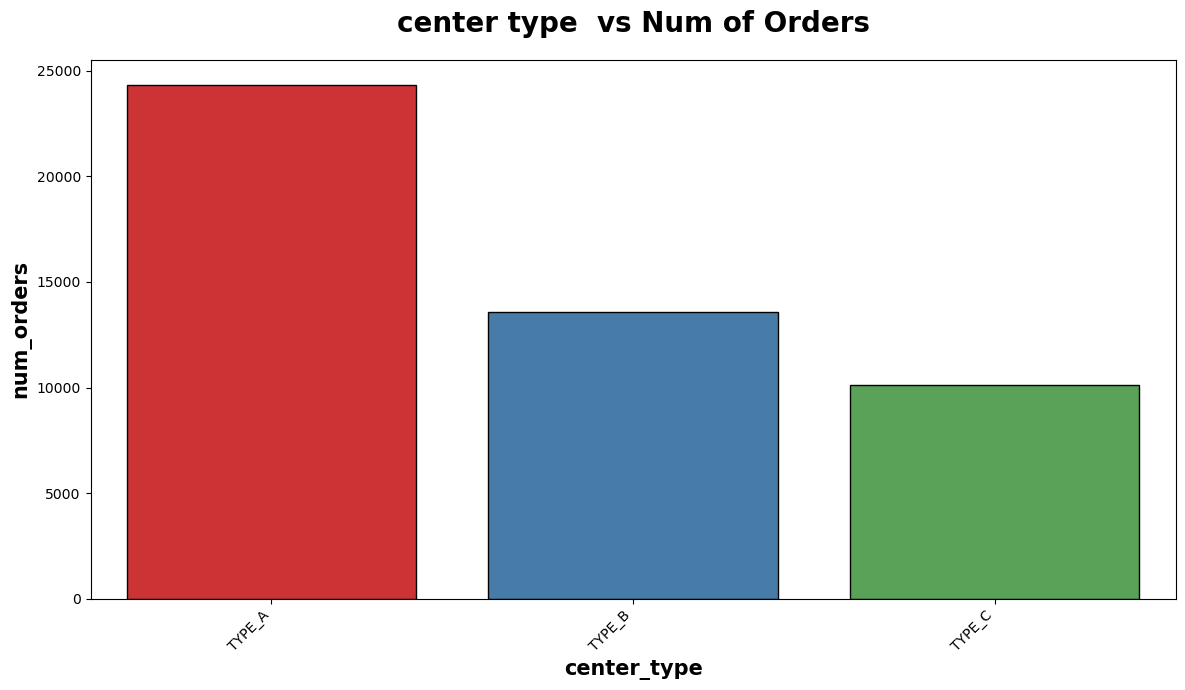

In [234]:
# Group by car name to get the highest selling price and sort the results
num_orders = train.groupby('center_type')['num_orders'].max().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x=num_orders.index, y=num_orders.values, palette='Set1', edgecolor='black')
plt.title('center type  vs Num of Orders', weight='bold', fontsize=20, pad=20)
plt.xlabel('center_type', weight='bold', fontsize=15)
plt.ylabel('num_orders', weight='bold', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotate for better readability

plt.show()

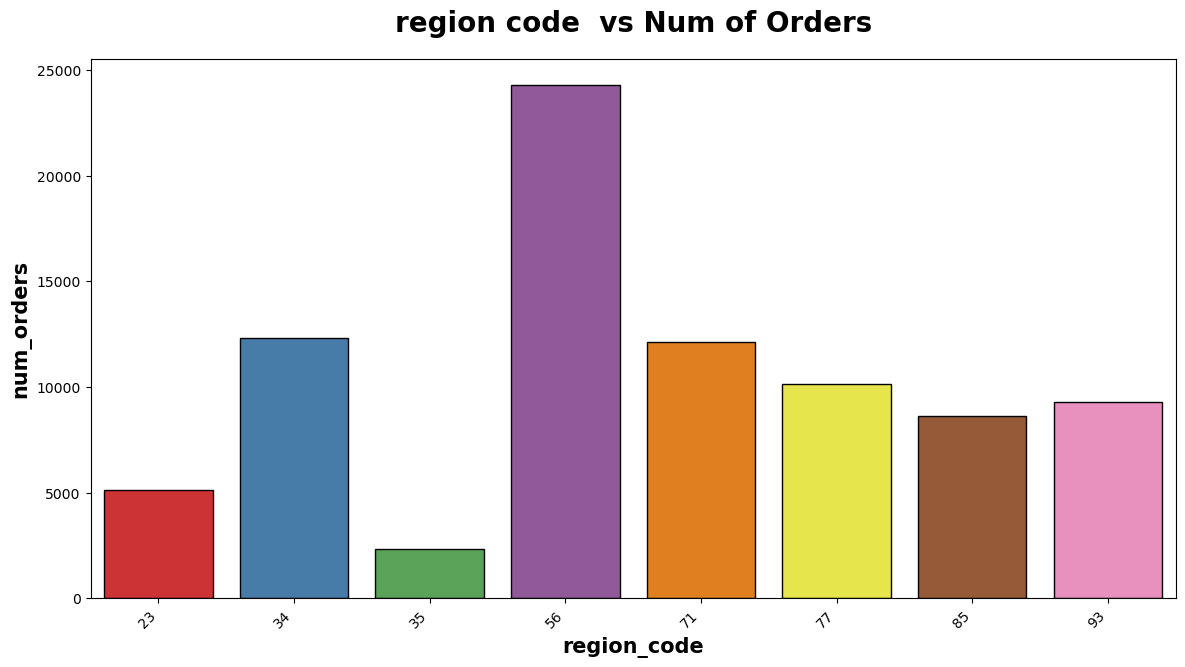

In [235]:

num_orders = train.groupby('region_code')['num_orders'].max().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x=num_orders.index, y=num_orders.values, palette='Set1', edgecolor='black')
plt.title('region code  vs Num of Orders', weight='bold', fontsize=20, pad=20)
plt.xlabel('region_code', weight='bold', fontsize=15)
plt.ylabel('num_orders', weight='bold', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotate for better readability

plt.show()

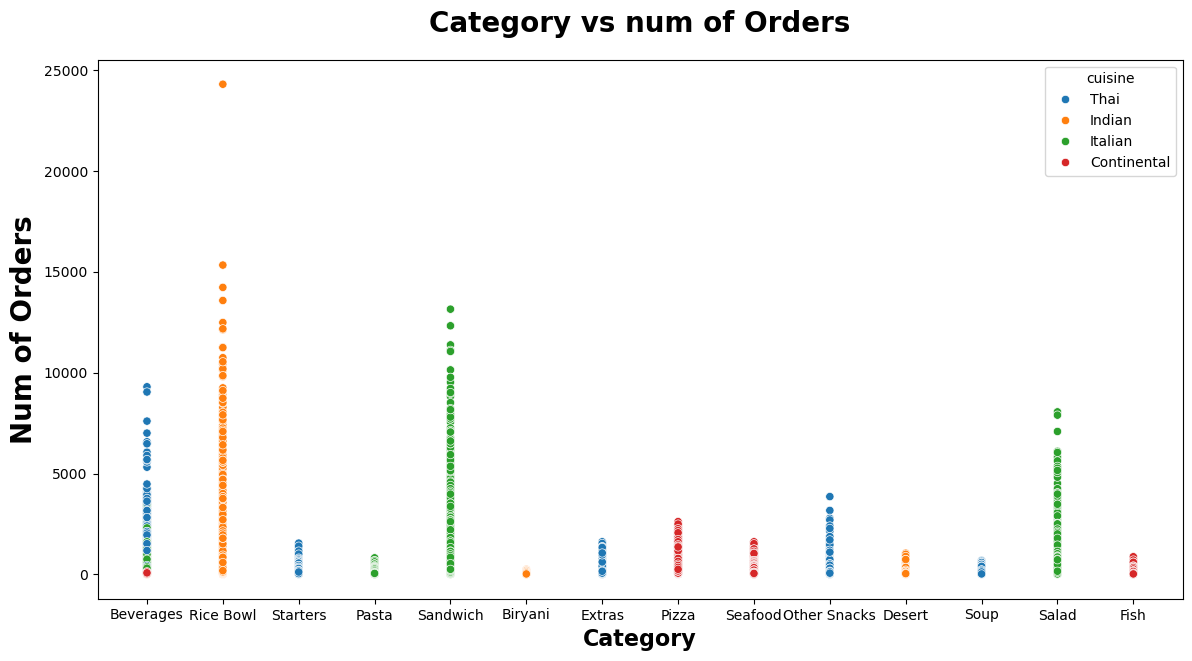

In [236]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x='category',y='num_orders',data=train,ec='white',color='b',hue='cuisine')
plt.title('Category vs num of Orders',weight='bold',fontsize=20,pad=20)
plt.ylabel('Num of Orders',weight='bold',fontsize=20)
plt.xlabel('Category',weight='bold',fontsize=16)
plt.show()

In [237]:
train[num_train.columns].corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


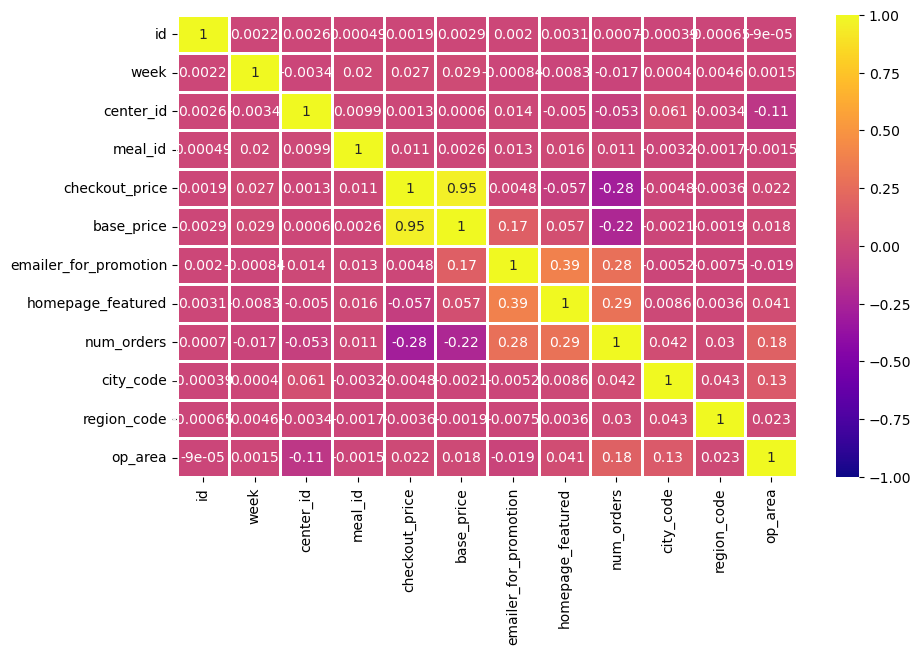

In [238]:
plt.figure(figsize=(10,6))
sns.heatmap(data=train[num_train.columns].corr(),annot=True,cmap='plasma',vmin=-1,vmax=1,linecolor='white',linewidths=2)
plt.show()

## Final Report

# Feature Engineering

In [241]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


#### Removing Unnecessary Features
**Dropping id,'emailer_for_promotion',homepage_featured,op_area**


#### Converting Categorical Columns into Numerical
**Using OneHotEncoder,Ordinal Encoder in Pipeline**

We are using a **Pipeline** to streamline the process of converting categorical variables into numerical values. Specifically, we apply **OneHotEncoder,Ordinal Enocder,Label Encoder** within the pipeline to automatically encode the categorical columns into numerical format. This technique transforms categorical features into binary columns, each representing one of the possible categories. By including the encoding step within the pipeline, we ensure that it is applied consistently to the training and testing data, without manually handling it outside the model. This helps in simplifying the workflow and avoiding data leakage.


In [244]:
from sklearn import set_config
train.drop(['id','op_area'], axis=1)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,68,Desert,Indian,473,77,TYPE_A
456544,145,61,2304,482.09,482.09,0,0,42,Desert,Indian,473,77,TYPE_A
456545,145,61,2664,237.68,321.07,0,0,501,Salad,Italian,473,77,TYPE_A
456546,145,61,2569,243.50,313.34,0,0,729,Salad,Italian,473,77,TYPE_A


In [245]:
test.drop(['id','op_area'], axis=1)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type
0,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C
1,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C
2,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C
3,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C
4,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C
...,...,...,...,...,...,...,...,...,...,...,...,...
32568,155,61,1543,482.09,484.09,0,0,Desert,Indian,473,77,TYPE_A
32569,155,61,2304,483.09,483.09,0,0,Desert,Indian,473,77,TYPE_A
32570,155,61,2664,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A
32571,155,61,2569,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A


In [317]:
num_col=['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'city_code',
 'region_code',
 'op_area']

cat_col=['emailer_for_promotion',
 'homepage_featured','category','cuisine','center_type']

In [319]:
scaler=StandardScaler()
train[num_col]=scaler.fit_transform(train[num_col])
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,-1.776494,-0.589577,-0.254535,-1.277687,-1.256048,-0.297187,-0.350123,177,Beverages,Thai,0.686548,-0.034837,TYPE_C,-1.9086
1,1466964,-1.776494,-0.589577,-0.057246,-1.277687,-1.358465,-0.297187,-0.350123,270,Beverages,Thai,0.686548,-0.034837,TYPE_C,-1.9086
2,1346989,-1.776494,-0.589577,0.940160,-1.290568,-1.358278,-0.297187,-0.350123,189,Beverages,Thai,0.686548,-0.034837,TYPE_C,-1.9086
3,1338232,-1.776494,-0.589577,0.209460,0.047477,0.518763,-0.297187,-0.350123,54,Beverages,Indian,0.686548,-0.034837,TYPE_C,-1.9086
4,1448490,-1.776494,-0.589577,1.108221,-0.580222,-0.694746,-0.297187,-0.350123,40,Beverages,Indian,0.686548,-0.034837,TYPE_C,-1.9086


In [321]:
enc=OneHotEncoder(drop='first',sparse_output=False)
encoded=enc.fit_transform(train[cat_col])
feature_names=enc.get_feature_names_out(cat_col)
encoded_df=pd.DataFrame(encoded,columns=feature_names)

In [323]:
train=pd.concat([train,encoded_df],axis=1)
train.drop(['emailer_for_promotion',
 'homepage_featured',
 'category',
 'cuisine',
 'center_type'],axis=1,inplace=True)

In [325]:
X=train.drop('num_orders',axis=1)
y=train['num_orders']

In [327]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
dtr=DecisionTreeRegressor(random_state=42)

In [ ]:
dtr.fit(X_train,y_train)

In [ ]:
dtr_pred=dtr.predict(X_test)

In [ ]:
mean_squared_log_error(y_test,dtr_pred)

In [ ]:
mean_absolute_error(y_test,dtr_pred)

In [ ]:
scaler=StandardScaler()
test[num_col]=scaler.fit_transform(test[num_col])
test.head()

In [ ]:
enc=OneHotEncoder(drop='first',sparse_output=False)
encoded=enc.fit_transform(test[cat_col])
feature_names=enc.get_feature_names_out(cat_col)
encoded_df=pd.DataFrame(encoded,columns=feature_names)

In [ ]:
test=pd.concat([test,encoded_df],axis=1)
test.drop(['emailer_for_promotion',
 'homepage_featured',
 'category',
 'cuisine',
 'center_type'],axis=1,inplace=True)